In [1]:
import tensorflow as tf
import keras
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [3]:
# Converting images to model input tensors and scaling the images
train_images = train_data.reshape(60000,28*28)
train_images = train_images.astype('float32') / 255

In [4]:
len(train_images)

60000

In [5]:
# Creating 2 training datasets, one with blank images added and another with noisy random images added
train_images_with_noise = np.concatenate([train_images,np.random.random((len(train_images) , 28*28))],axis=1) # Concatenating noisy random images to existing trainining dataset
train_images_without_noise = np.concatenate([train_images,np.zeros((len(train_images),28*28))],axis=1) # Concatenating blank images to existing training dataset

In [6]:
# Model build
from keras import Sequential
from keras import layers
from keras.layers import Dense

def get_model():
    model = Sequential()
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [8]:
# 2 different instances of the same model to train them on different datasets create earlier for comparison
model1 = get_model()
model2 = get_model()

In [8]:
history1 = model1.fit(train_images_without_noise,train_labels,epochs=20,batch_size=128,validation_split=0.2)
history2 = model2.fit(train_images_with_noise,train_labels,epochs=20,batch_size=128,validation_split=0.2)
print("History 1 :", history1)
print("History 2 :", history2)

Epoch 1/20
375/375 [==============================] - 5s 8ms/step - loss: 0.2921 - accuracy: 0.9156 - val_loss: 0.1493 - val_accuracy: 0.9581
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1209 - accuracy: 0.9643 - val_loss: 0.1094 - val_accuracy: 0.9688
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0798 - accuracy: 0.9766 - val_loss: 0.0908 - val_accuracy: 0.9718
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0569 - accuracy: 0.9824 - val_loss: 0.0865 - val_accuracy: 0.9740
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0425 - accuracy: 0.9875 - val_loss: 0.0842 - val_accuracy: 0.9768
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0323 - accuracy: 0.9905 - val_loss: 0.0801 - val_accuracy: 0.9768
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0244 - accuracy: 0.9929 - val_loss: 0.0825 - val_accuracy: 0.9775
Epoch 

In [12]:
history1_dict = history1.history
history2_dict = history2.history

In [14]:
history1_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

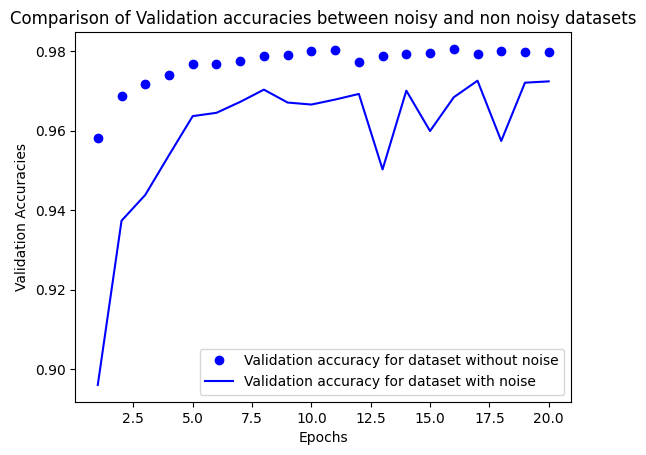

In [18]:
import matplotlib.pyplot as plt

epochs = range(1,len(history1_dict["loss"])+1)

plt.plot(epochs, history1_dict["val_accuracy"], 'bo', label='Validation accuracy for dataset without noise')
plt.plot(epochs,history2_dict["val_accuracy"],'b',label='Validation accuracy for dataset with noise')
plt.legend()
plt.title("Comparison of Validation accuracies between noisy and non noisy datasets")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracies")
plt.show()


In [19]:
# Dataset haivng noise has less validation accuracy , and as the noise increases the validation accuracy decreases